Random forest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/heart (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
x=df.drop('target',axis=1)
y=df['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(f'Accuracy Score;{accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')

Accuracy Score;0.9902597402597403
Confusion Matrix:
[[159   0]
 [  3 146]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [ ]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_importance

,0
cp,0.134160
ca,0.129561
thalach,0.117750
thal,0.117438
oldpeak,0.111725
age,0.088266
chol,0.078490
trestbps,0.065637
slope,0.054638
exang,0.041942


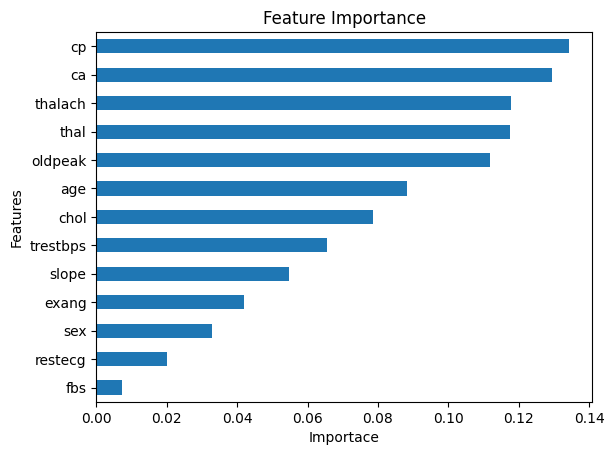

In [ ]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=True)
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importace')
plt.ylabel('Features')
plt.show()

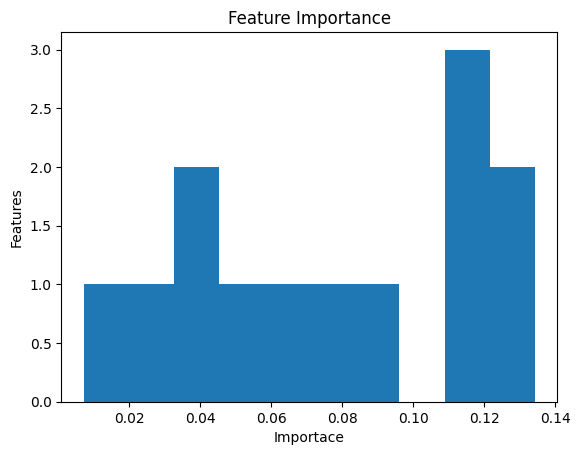

In [ ]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=True)
feature_importance.plot(kind='hist')
plt.title('Feature Importance')
plt.xlabel('Importace')
plt.ylabel('Features')
plt.show()

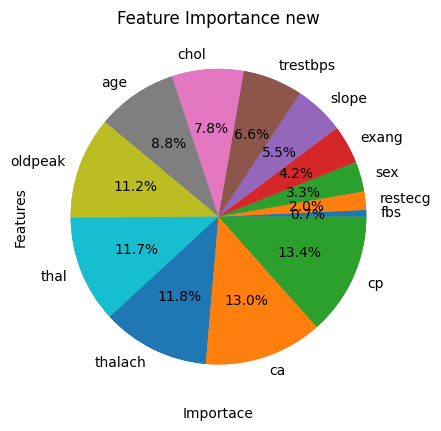

In [ ]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=True)
feature_importance.plot(kind='pie')
plt.pie(feature_importance,autopct='%1.1f%%')
plt.title('Feature Importance new')
plt.xlabel('Importace')
plt.ylabel('Features')
plt.show()

In [ ]:
clf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

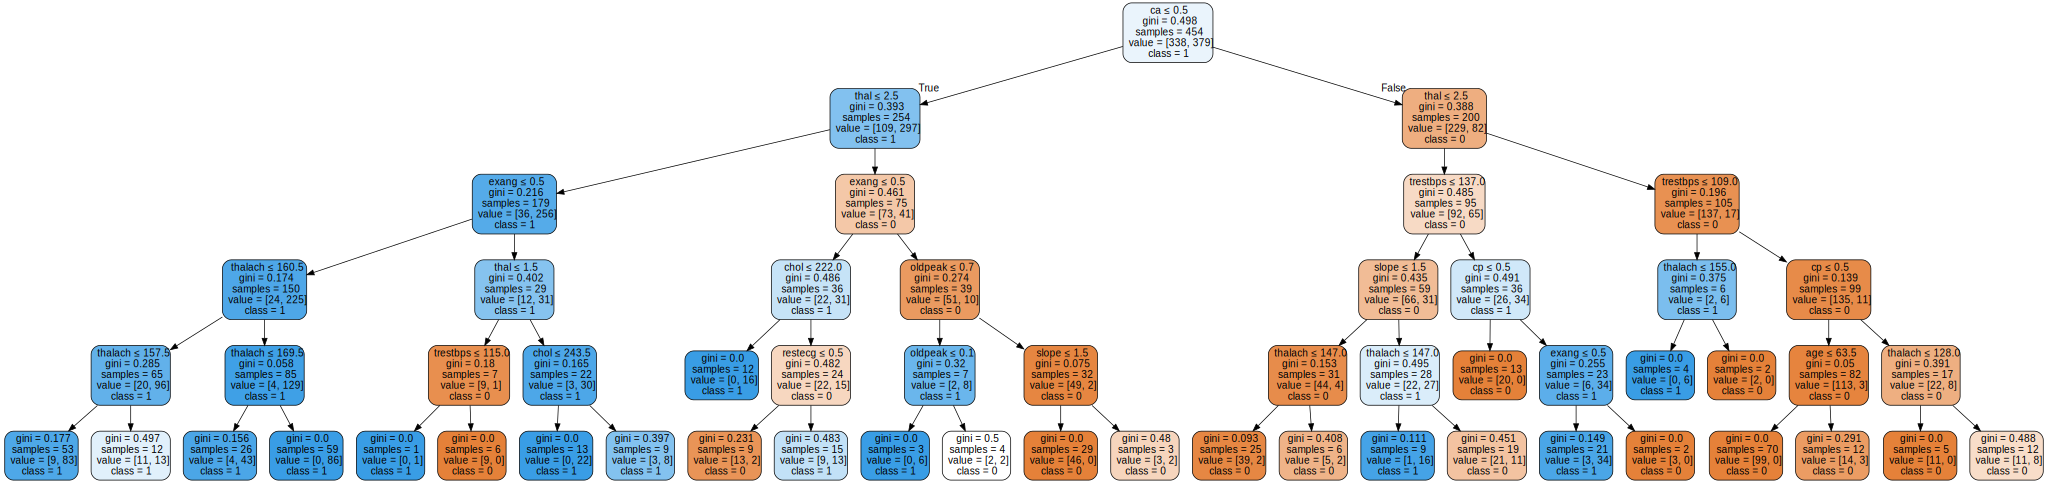

In [ ]:
tree=clf.estimators_[0]
dot_data=export_graphviz(tree,out_file=None,feature_names=x.columns,class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph.render('tree')
graph

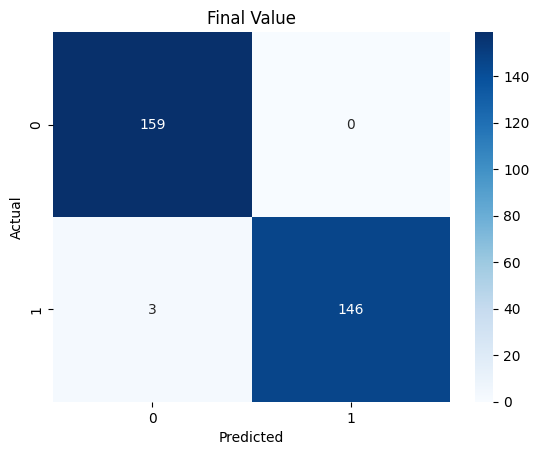

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Final Value')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()